In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.utils import np_utils

In [2]:
#import tensorflow
#tensorflow.__version__

In [4]:
# Load the dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [6]:
print(x_test.shape,y_test.shape)

(10000, 28, 28) (10000,)


In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

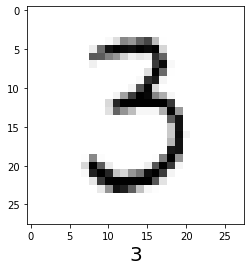

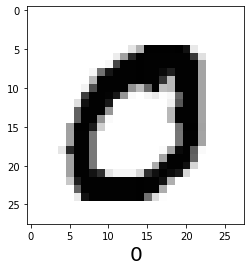

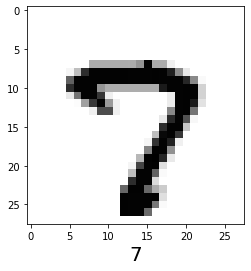

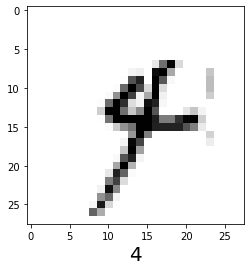

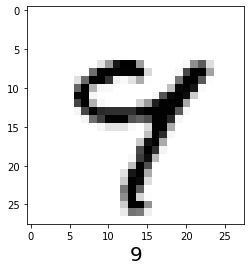

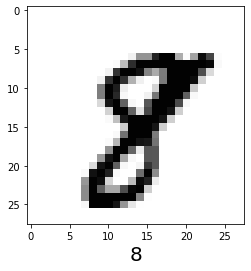

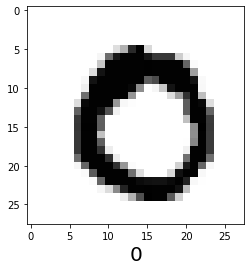

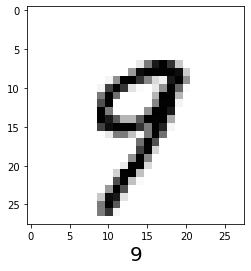

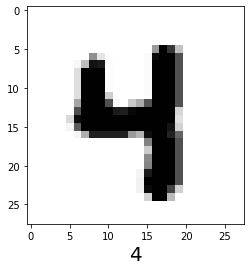

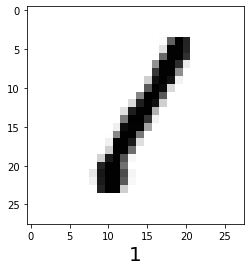

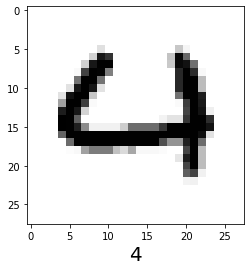

In [8]:
for i in range(50,61):   
    plt.imshow(x_train[i],cmap='Greys')
    plt.xlabel(y_train[i],fontsize=20)
    plt.show()

In [8]:
# We have to convert 28X28 to 28X28X1

In [9]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [ ]:
# reshape
"""
28 and 28 represent the desired height and width dimensions of the images.

1 represents the number of channels in the image. In this case, it's set to 1 because the data is reshaped to have a single channel. This is typically the case for grayscale images. If the original images were RGB (with three color channels), the value would be 3.

By reshaping the data using x_train.reshape(x_train.shape[0], 28, 28, 1), 
you are converting the original 2D images of size 28x28 into a 4D tensor. 
The first dimension represents the number of samples, the second and third 
dimensions represent the height and width of each image, and the fourth 
dimension represents the number of channels.
"""

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [12]:
x_test.shape

(10000, 28, 28, 1)

In [13]:
# Normalise the image

In [13]:
x_train = x_train/255
x_test = x_test/255
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [14]:
# One hot encoding on y
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
pd.set_option('display.max_columns',None)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [20]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### CNN model

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(40,(4,4),input_shape=(28,28,1),padding='same',strides=(2,2))) # 14X14X40
model.add(MaxPooling2D(pool_size=(2,2)))          # 7x7x40
model.add(Conv2D(100,(4,4)))                      # 4x4x100
model.add(MaxPooling2D(pool_size=(2,2)))          # 2x2x100
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))
# (n + 2p -f)/s + 1

In [ ]:
# model.add(Conv2D(40,(4,4),input_shape=(28,28,1),padding='same',strides=(2,2)))
""" # Conv2D: This is the convolutional layer in Keras.
# 40: It specifies the number of filters or output channels in the layer.
#(4, 4): It defines the size of the filters or the kernel.
#input_shape=(28, 28, 1): It specifies the shape of the input data. In this case, it indicates that the input images have a height and width of 28x28 pixels and a single channel (grayscale images).
#padding='same': It adds padding to the input data to ensure that the output 
feature maps have the same spatial dimensions as the input. 
Padding helps retain more information from the edges of the images during 
convolution.
#strides=(2, 2): It specifies the stride or step size of the filter during convolution. In this case, the filter moves by 2 pixels in both the height and width dimensions.
By adding this layer to the model, you are introducing a convolutional 
operation that convolves the filters over the input images. 
The filters extract features from the input data, capturing patterns and 
spatial information.

The output shape of this layer depends on the padding, strides, 
and input shape. Since padding='same' is used, the output feature maps 
will have the same spatial dimensions as the input. 
The number of output channels is set to 40, as specified in the layer
configuration.
"""

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 40)        680       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 40)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 100)         64100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 100)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 200)               8

In [26]:
# Compile the model

In [25]:
model.compile(loss='categorical_crossentropy', metrics=['Accuracy'],optimizer='adam')

In [26]:
model.fit(x_train,y_train,batch_size=1000, epochs=10)

Epoch 1/10
60/60 [==============================] - 96s 1s/step - loss: 0.8069 - Accuracy: 0.7826
Epoch 2/10
60/60 [==============================] - 56s 919ms/step - loss: 0.1724 - Accuracy: 0.9489
Epoch 3/10
60/60 [==============================] - 51s 851ms/step - loss: 0.1125 - Accuracy: 0.9669
Epoch 4/10
60/60 [==============================] - 63s 1s/step - loss: 0.0840 - Accuracy: 0.9758
Epoch 5/10
60/60 [==============================] - 87s 1s/step - loss: 0.0669 - Accuracy: 0.9803
Epoch 6/10
60/60 [==============================] - 69s 1s/step - loss: 0.0602 - Accuracy: 0.9819
Epoch 7/10
60/60 [==============================] - 56s 935ms/step - loss: 0.0506 - Accuracy: 0.9849
Epoch 8/10
60/60 [==============================] - 70s 1s/step - loss: 0.0443 - Accuracy: 0.9864
Epoch 9/10
60/60 [==============================] - 73s 1s/step - loss: 0.0366 - Accuracy: 0.9890
Epoch 10/10
60/60 [==============================] - 71s 1s/step - loss: 0.0332 - Accuracy: 0.9902


In [ ]:
# model.fit(x_train,y_train,batch_size=1000, epochs=10)
"""
x_train: This parameter represents the input training data. It consists of a collection of images or feature vectors used to train the model.

y_train: This parameter represents the corresponding labels or target values for the input training data. It contains the desired output or class labels associated with each training sample.

batch_size: This parameter determines the number of samples processed in each iteration or batch during training. In this case, the batch size is set to 1000, meaning that the model will update its weights after processing 1000 training samples.

epochs: This parameter specifies the number of times the entire training dataset is passed through the model during training. In this case, the model will be trained for 10 epochs.

During the training process, the model will iterate over the training data in batches, compute predictions using the current model weights, compare the predictions with the true labels, and update the model's weights to minimize the defined loss function. This process is known as backpropagation and is used to optimize the model's parameters.
"""

In [2]:
# SAving and loading the model
model_json = model.to_json()

In [ ]:
model_json

In [30]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [31]:
model.save_weights("model_mnist.h5")

In [32]:
# Loading the model

In [33]:
json_file = open('model.json', 'r')

In [34]:
loaded_model_json = json_file.read()

In [35]:
from keras.models import model_from_json
loaded_model = model_from_json(loaded_model_json)

In [36]:
loaded_model.load_weights("model_mnist.h5")

In [37]:
# Evaluate the model

In [39]:
#loaded_model.evaluate(x_test,y_test)

In [40]:
y_test.shape

(10000, 10)

In [42]:
y_pred = loaded_model.predict(x_test)

In [2]:
y_pred

In [44]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [45]:
y_pred_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [46]:
y_test = [np.argmax(i) for i in y_test]

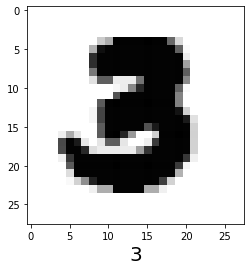

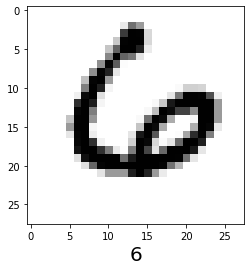

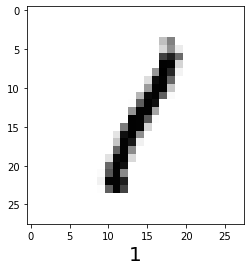

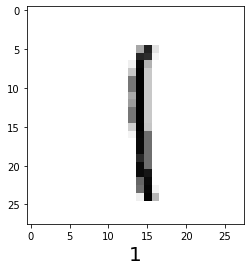

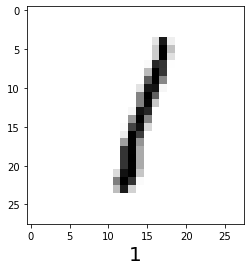

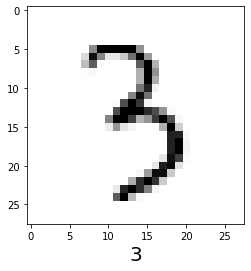

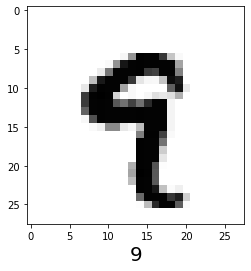

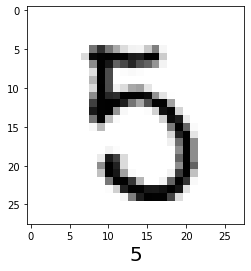

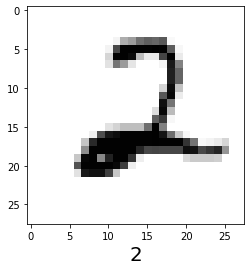

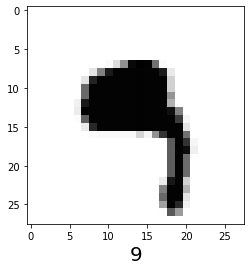

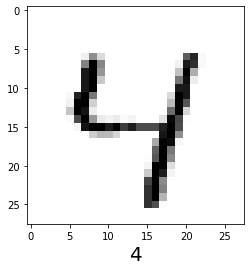

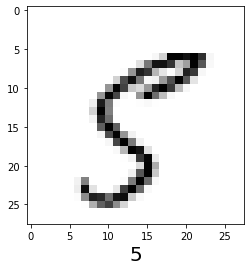

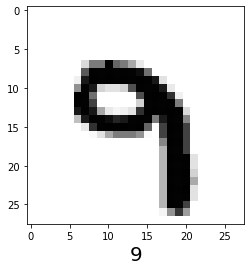

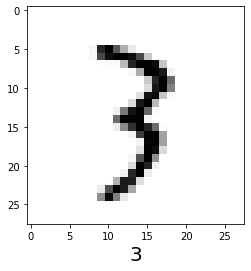

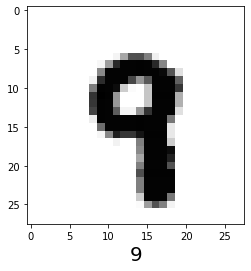

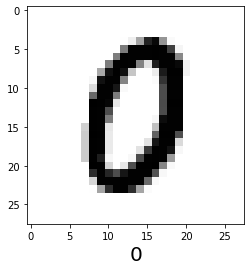

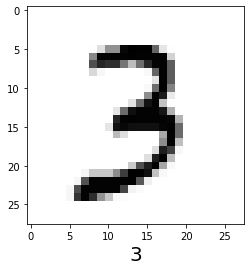

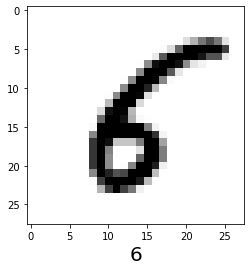

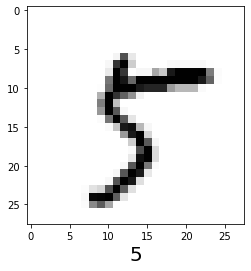

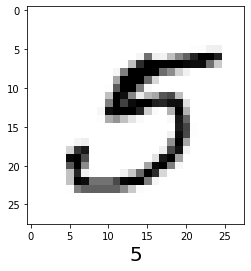

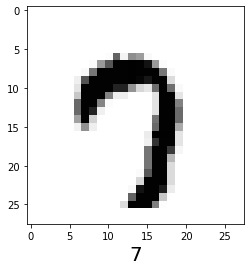

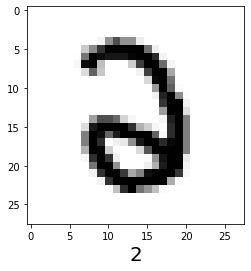

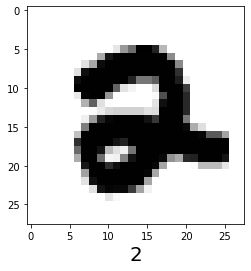

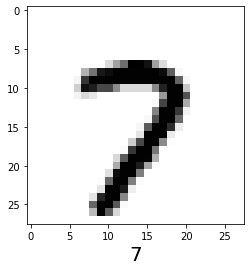

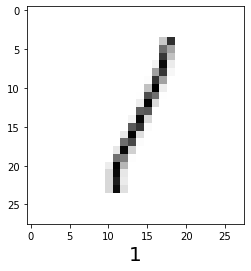

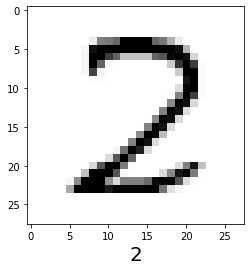

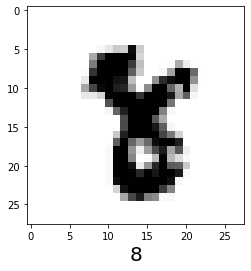

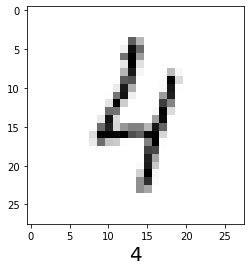

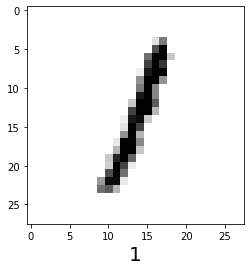

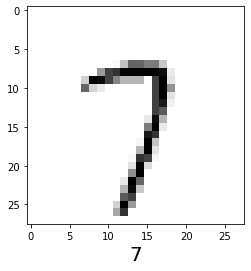

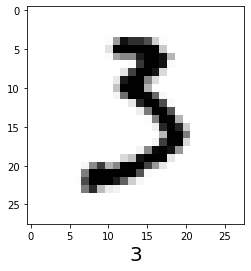

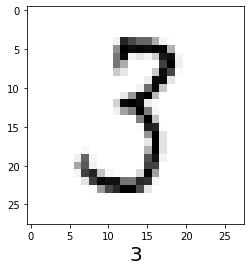

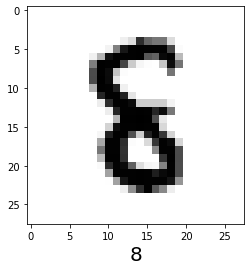

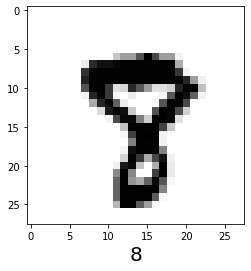

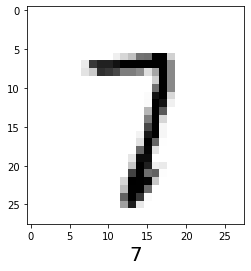

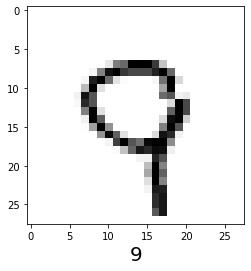

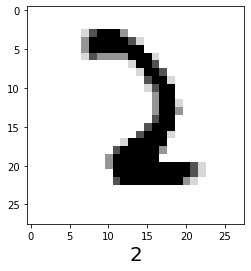

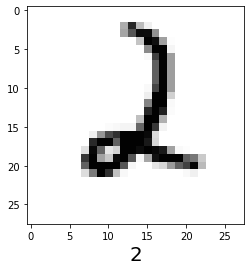

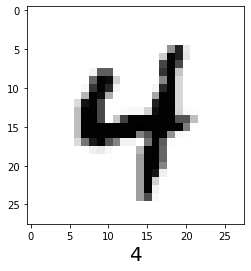

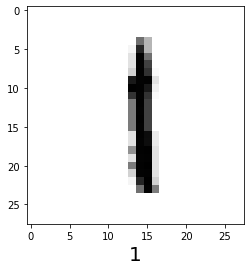

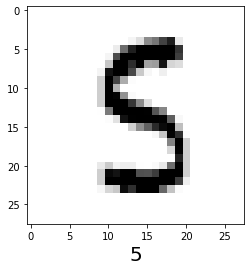

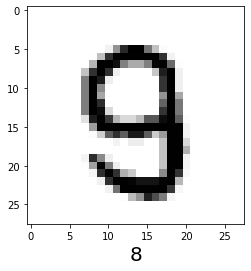

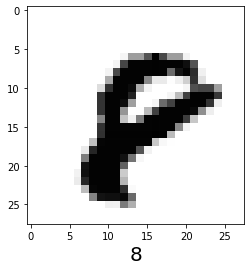

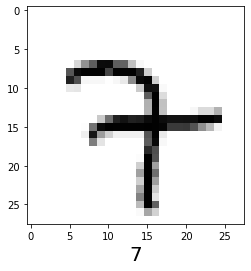

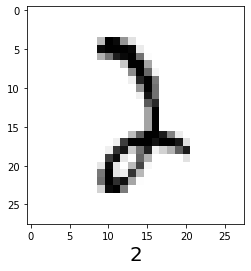

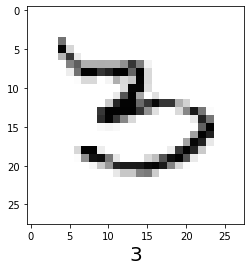

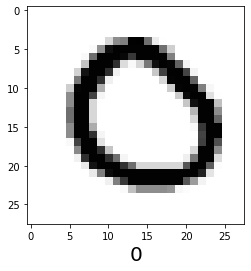

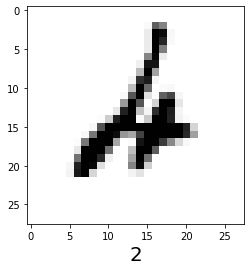

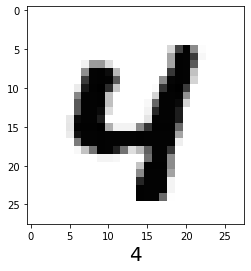

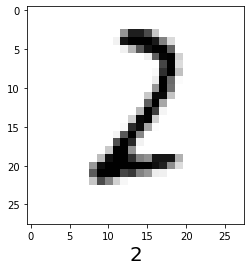

In [47]:
for i in range(200,250):   
    plt.imshow(x_test[i], cmap='Greys')
    plt.xlabel(y_pred_labels[i],fontsize=20)
    plt.show()

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [49]:
cm = confusion_matrix(y_test,y_pred_labels)


<AxesSubplot:>

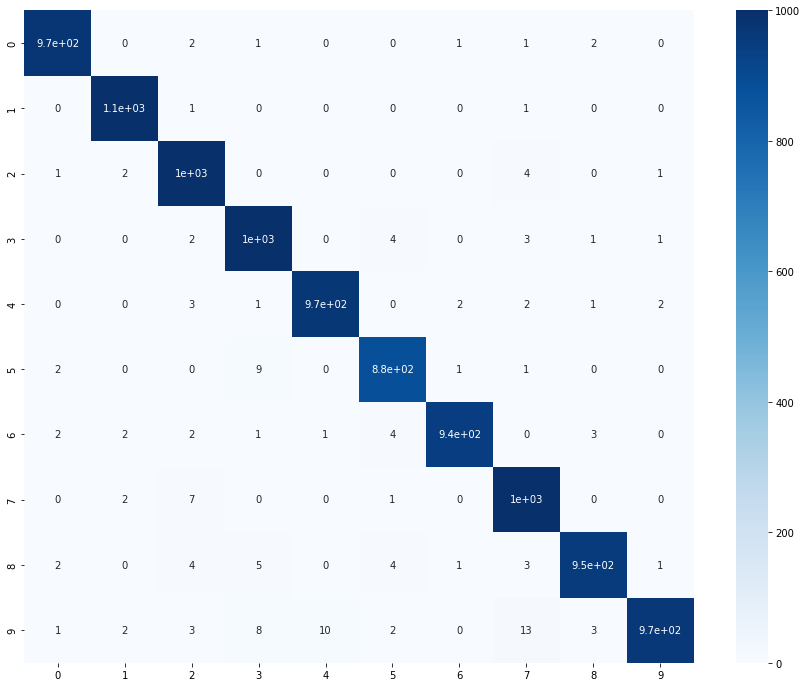

In [52]:
plt.figure(figsize=(15,12))
sns.heatmap(cm,annot=True,vmax=1000,vmin=0,cmap='Blues')

In [53]:
accuracy_score(y_test,y_pred_labels)

0.9861